In [21]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Wine.csv')

# Separate features (X) and labels (y)
X = data.drop('Customer_Segment', axis=1)
y = data['Customer_Segment']

In [20]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
principal_components = pca.fit_transform(X_scaled)

In [24]:
import numpy as np

# Find the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Determine the number of components that capture 95% of the variance
n_components = np.argmax(cumulative_variance >= 0.95) + 1

In [25]:
selected_components = principal_components[:, :n_components]

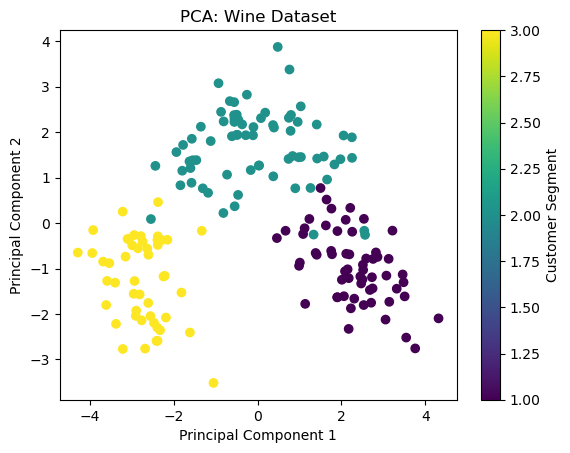

In [26]:
import matplotlib.pyplot as plt

# Assuming the first two principal components capture most variance and can be used for visualization
plt.scatter(selected_components[:, 0], selected_components[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: Wine Dataset')
plt.colorbar(label='Customer Segment')
plt.show()